In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(-0.05543971262241687,
 1.1511541399734535,
 -0.03007166663760316,
 0.3306957174222154)

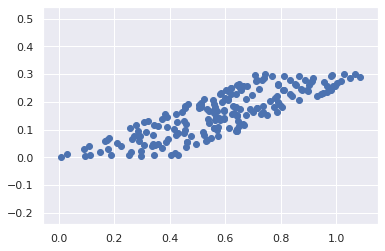

In [22]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.rand(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.components_      

array([[-0.9534372 , -0.30159162],
       [ 0.30159162, -0.9534372 ]])

In [25]:
pca.explained_variance_

array([0.06022031, 0.00197053])

(-0.05543971262241687,
 1.1511541399734535,
 -0.03007166663760316,
 0.3306957174222154)

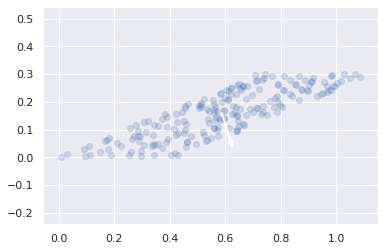

In [26]:
def draw_vector(v0,v1,ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)
plt.scatter(X[:,0],X[:,1],alpha = 0.2)
for length,vector in zip(pca.explained_variance_,pca.components_):
    v = vector*3*np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)
plt.axis('equal')

In [29]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('origianl shape: ', X.shape)
print("Transform shape: ", X_pca.shape)

origianl shape:  (200, 2)
Transform shape:  (200, 1)


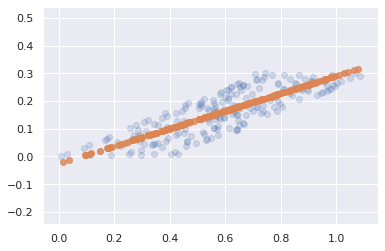

In [30]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [31]:
#PCA for Visualization Handwriiten Digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [33]:
pca = PCA(2)
project = pca.fit_transform(digits.data)
print(digits.data.shape)
print(project.shape)

(1797, 64)
(1797, 2)


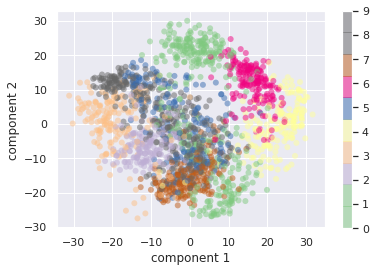

In [41]:
plt.scatter(project[:, 0], project[:, 1],
c=digits.target, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();